In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv(r'E:\DataScience\MyProjects\healthcare_dataset.csv')
print(df)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

In [25]:
print(df.isna().sum())  #checking null values(Null values ondel athine mean vech fill chyyanam)

print("Duplicates:",df.duplicated().sum())  #checking duplicate values



Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Duplicates: 534


In [26]:
df.drop_duplicates(inplace=True)   #deleting duplicate values
print("Duplicates:",df.duplicated().sum())  #Now 0

Duplicates: 0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [28]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission']) #converting datatype to datetime format
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [29]:
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood_Type          54966 non-null  object        
 4   Medical_Condition   54966 non-null  object        
 5   Date_of_Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance_Provider  54966 non-null  object        
 9   Billing_Amount      54966 non-null  float64       
 10  Room_Number         54966 non-null  int64         
 11  Admission_Type      54966 non-null  object        
 12  Discharge_Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [30]:
df['Billing_Amount'] = df['Billing_Amount'].round(2)
print(df['Billing_Amount'])

0        18856.28
1        33643.33
2        27955.10
3        37909.78
4        14238.32
           ...   
55495     2650.71
55496    31457.80
55497    27620.76
55498    32451.09
55499     4010.13
Name: Billing_Amount, Length: 54966, dtype: float64


In [31]:
df = df.apply(lambda x: x.str.title() if x.dtype == "object" else x) #Column values ellam title() formatilekk matti
print(df)
print("Duplicates:",df.duplicated().sum())

                    Name  Age  Gender Blood_Type Medical_Condition  \
0          Bobby Jackson   30    Male         B-            Cancer   
1           Leslie Terry   62    Male         A+           Obesity   
2            Danny Smith   76  Female         A-           Obesity   
3           Andrew Watts   28  Female         O+          Diabetes   
4          Adrienne Bell   43  Female        Ab+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  Elizabeth Jackson   42  Female         O+            Asthma   
55496         Kyle Perez   61  Female        Ab-           Obesity   
55497       Heather Wang   38  Female         B+      Hypertension   
55498     Jennifer Jones   43    Male         O-         Arthritis   
55499       James Garcia   53  Female         O+         Arthritis   

      Date_of_Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons And Miller   
1        

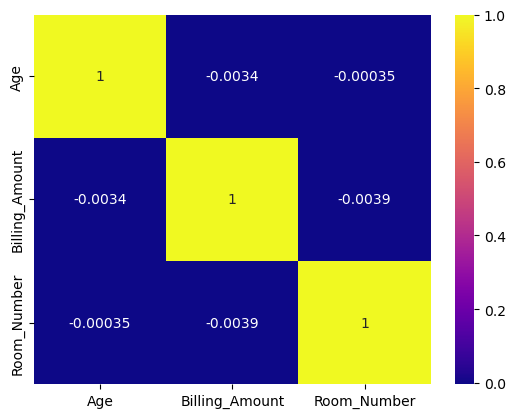

In [32]:
#finding correlation
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation,annot=True,cmap='plasma')
plt.show()

1.How many unique patients are in the dataset?

In [33]:
unique_patients = df["Name"].nunique()
print(f"Total Unique Patients: {unique_patients}")


Total Unique Patients: 40235


2.What is the frequency of each medical condition?condition_counts = df["Medical_Condition"].value_counts()

In [34]:

print(condition_counts)
print("Total number of patients:", df.shape[0])
#plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Patients by Medical Condition")
plt.show()


NameError: name 'condition_counts' is not defined

3.Which medical condition is the most frequently diagnosed among patients, and how does its occurrence compare to other conditions?

Most frequently diagnosed disease: Arthritis
Medical_Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64


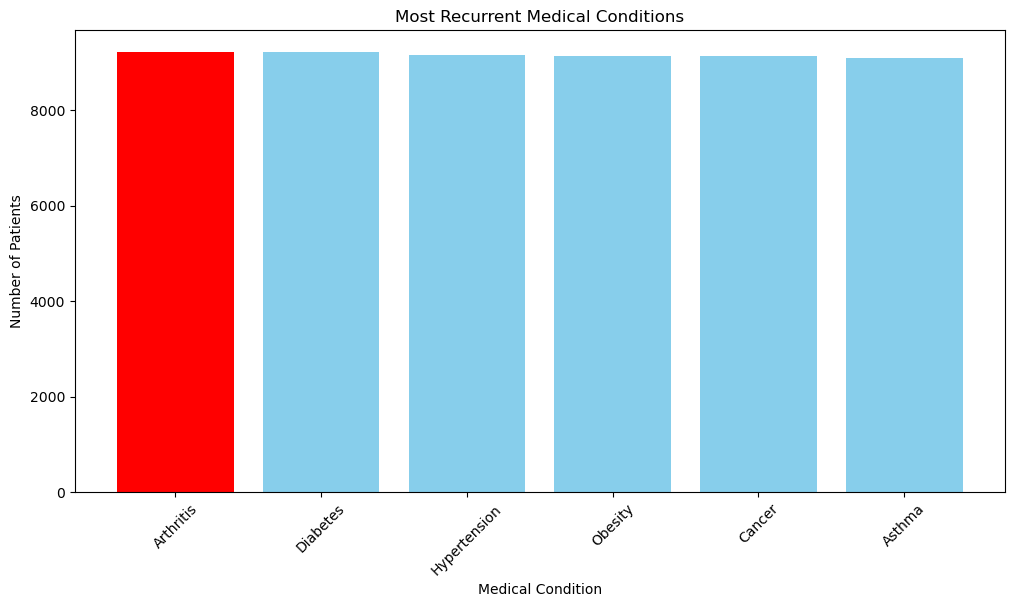

In [ ]:

# Count occurrences of each medical condition
condition_counts = df["Medical_Condition"].value_counts()

# Get the most recurrent condition
most_recurrent = condition_counts.idxmax()
print("Most frequently diagnosed disease:", most_recurrent)
print(condition_counts)

# Plot with color highlighting
colors = ["red" if condition == most_recurrent else "skyblue" for condition in condition_counts.index]

plt.figure(figsize=(12, 6))
plt.bar(condition_counts.index, condition_counts.values, color=colors)
plt.xticks(rotation=45)
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")
plt.title("Most Recurrent Medical Conditions")

plt.show()



4.Which combination of medical conditions is most commonly found in patients with multiple diagnoses?

              Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Arthritis          9218       0       0         0             0        0
Asthma                0    9095       0         0             0        0
Cancer                0       0    9140         0             0        0
Diabetes              0       0       0      9216             0        0
Hypertension          0       0       0         0          9151        0
Obesity               0       0       0         0             0     9146


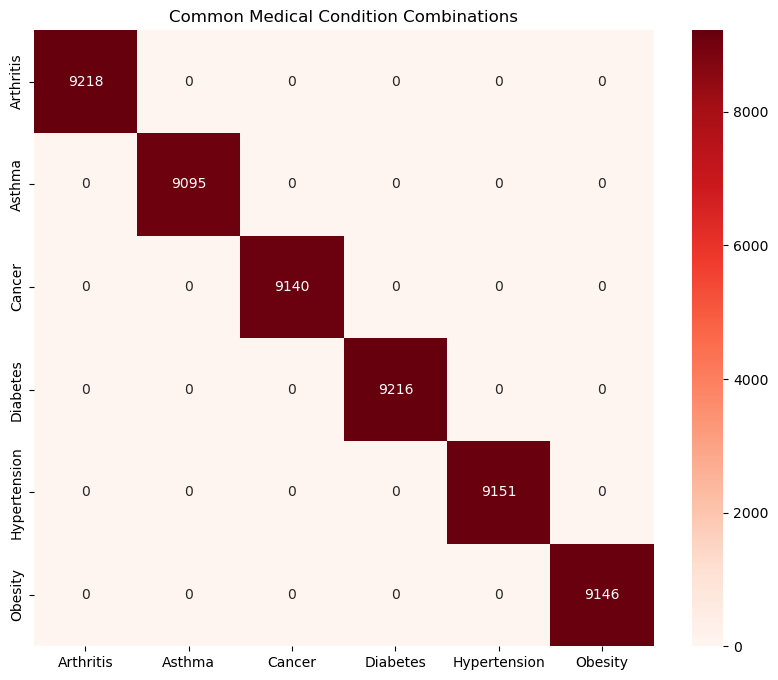

In [ ]:
import pandas as pd

# Create a co-occurrence matrix
conditions = df["Medical_Condition"].str.get_dummies(sep=",")
co_occurrence = conditions.T.dot(conditions)

# Display the co-occurrence matrix
print(co_occurrence)


# Create co-occurrence matrix
conditions = df["Medical_Condition"].str.get_dummies(sep=",")
co_occurrence = conditions.T.dot(conditions)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, cmap="Reds", annot=True, fmt=".0f")

plt.title("Common Medical Condition Combinations")
plt.show()



5. Does a patient’s blood type influence their susceptibility to specific medical conditions?

Medical_Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood_Type                                                                   
A+                      1107    1124    1171      1201          1123     1170
A-                      1144    1162    1124      1154          1186     1128
Ab+                     1124    1173    1100      1165          1204     1116
Ab-                     1179    1123    1186      1132          1108     1146
B+                      1191    1104    1186      1180          1087     1137
B-                      1152    1108    1131      1136          1163     1182
O+                      1186    1162    1098      1142          1145     1122
O-                      1135    1139    1144      1106          1135     1145


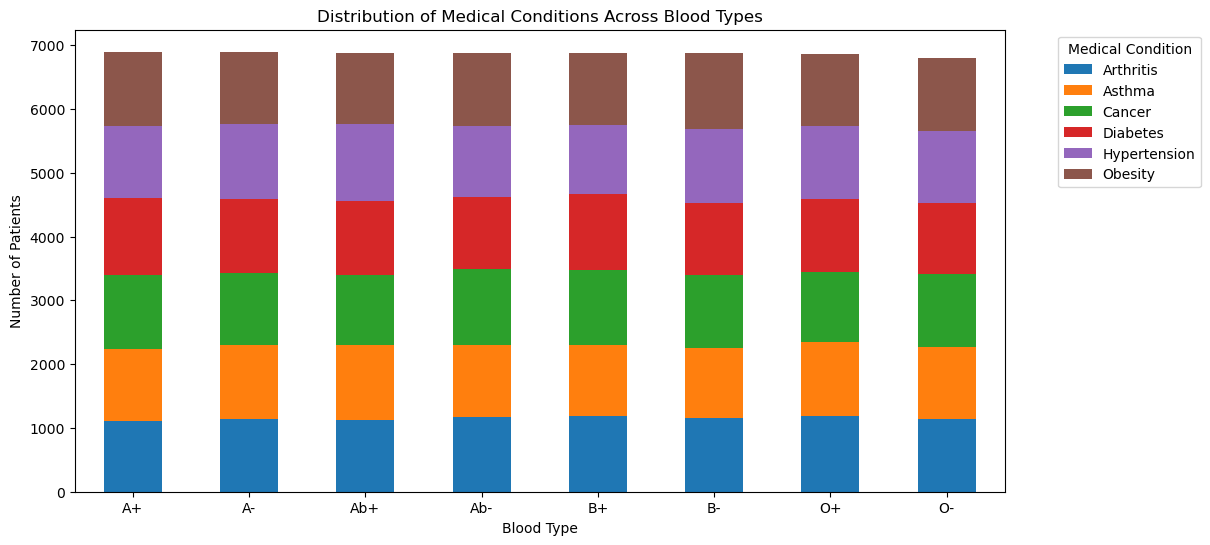

In [ ]:
# Count of medical conditions for each blood type
blood_condition = df.groupby("Blood_Type")["Medical_Condition"].value_counts().unstack()

# Display the result
print(blood_condition)


# Plot the stacked bar chart
blood_condition.plot(kind="bar", stacked=True, figsize=(12, 6))

plt.xlabel("Blood Type")
plt.ylabel("Number of Patients")
plt.title("Distribution of Medical Conditions Across Blood Types")
plt.legend(title="Medical Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)

plt.show()

6.Do younger patients recover faster than older patients for the same condition?df["Length_of_Stay"] = (df["Discharge_Date"] - df["Date_of_Admission"]).dt.days


Age_Group              Young  Middle-Aged    Elderly
Medical_Condition                                   
Arthritis          15.591385    15.387296  15.540569
Asthma             15.635049    15.791760  15.627768
Cancer             15.285309    15.342045  15.670255
Diabetes           15.512865    15.359825  15.441948
Hypertension       15.575687    15.248412  15.491707
Obesity            15.167418    15.201342  15.694456


C:\Users\HP\AppData\Local\Temp\ipykernel_1404\3494115115.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recovery_analysis = df.groupby(["Medical_Condition", "Age_Group"])["Length_of_Stay"].mean().unstack()


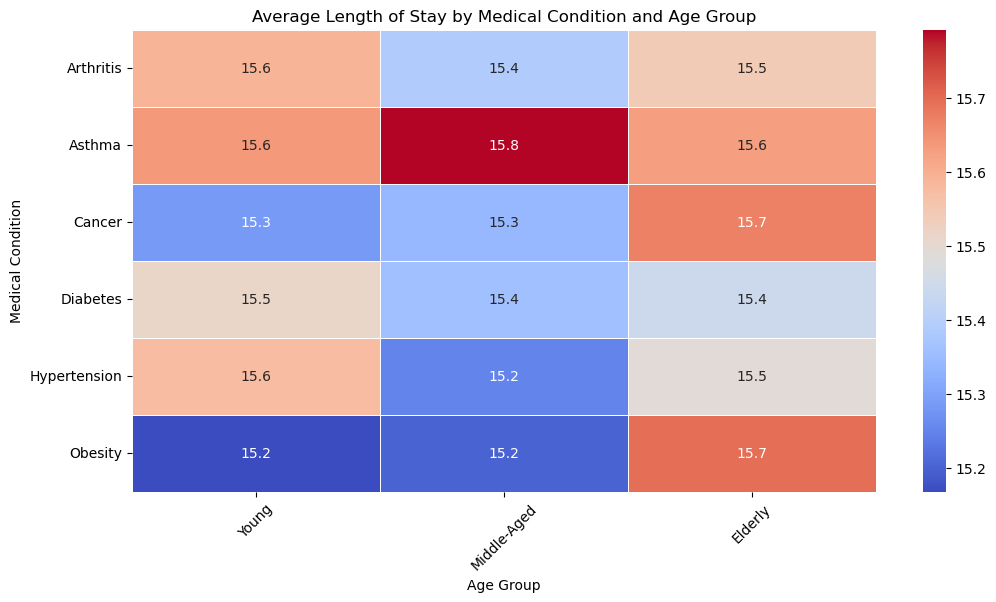

In [ ]:
# Group by condition and age group
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 30, 50, 100], labels=["Young", "Middle-Aged", "Elderly"])
recovery_analysis = df.groupby(["Medical_Condition", "Age_Group"])["Length_of_Stay"].mean().unstack()

print(recovery_analysis)

plt.figure(figsize=(12, 6))
sns.heatmap(recovery_analysis, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Average Length of Stay by Medical Condition and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Medical Condition")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

7.Are elderly patients more likely to be re-hospitalized?

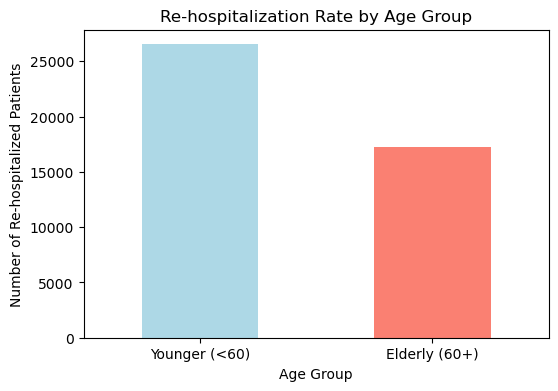

In [ ]:
df["Elderly"] = df["Age"] >= 60
rehospitalization_rate = df.groupby("Elderly")["Name"].nunique()

plt.figure(figsize=(6, 4))
rehospitalization_rate.plot(kind="bar", color=["lightblue", "salmon"])
plt.xticks(ticks=[0, 1], labels=["Younger (<60)", "Elderly (60+)"], rotation=0)
plt.xlabel("Age Group")
plt.ylabel("Number of Re-hospitalized Patients")
plt.title("Re-hospitalization Rate by Age Group")
plt.show()

8.Are there any seasonal trends in medical conditions?

Medical_Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Admission_Month                                                              
1                        791     841     723       780           751      769
2                        744     700     698       700           699      669
3                        739     773     802       762           744      802
4                        723     745     755       777           758      720
5                        764     720     757       735           793      786
6                        757     796     753       829           762      753
7                        819     783     773       821           788      781
8                        840     819     815       747           787      777
9                        737     775     757       742           738      759
10                       753     711     772       797           799      781
11                       754     701     783       786          

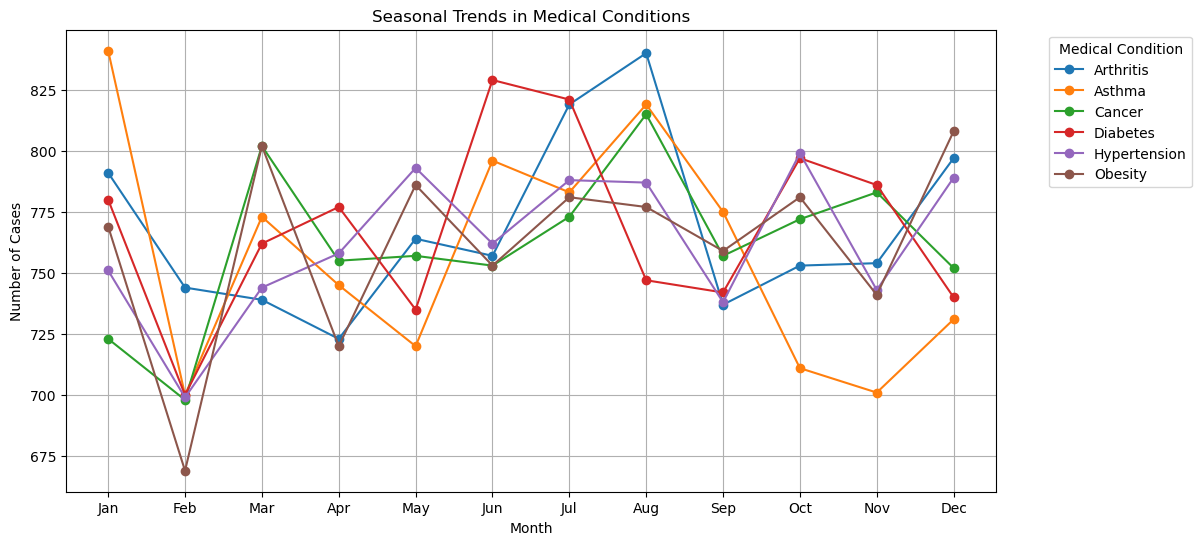

In [ ]:
df["Admission_Month"] = df["Date_of_Admission"].dt.month
seasonal_trends = df.groupby("Admission_Month")["Medical_Condition"].value_counts().unstack()
print(seasonal_trends)

# Extract the month from admission date
df["Admission_Month"] = df["Date_of_Admission"].dt.month

# Count occurrences of medical conditions per month
seasonal_trends = df.groupby("Admission_Month")["Medical_Condition"].value_counts().unstack()

# Plot the data
seasonal_trends.plot(kind="line", figsize=(12, 6), marker="o")

plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.title("Seasonal Trends in Medical Conditions")
plt.legend(title="Medical Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.grid()
plt.show()

9.Can we identify high-risk patients based on their previous hospitalization records and medical history?

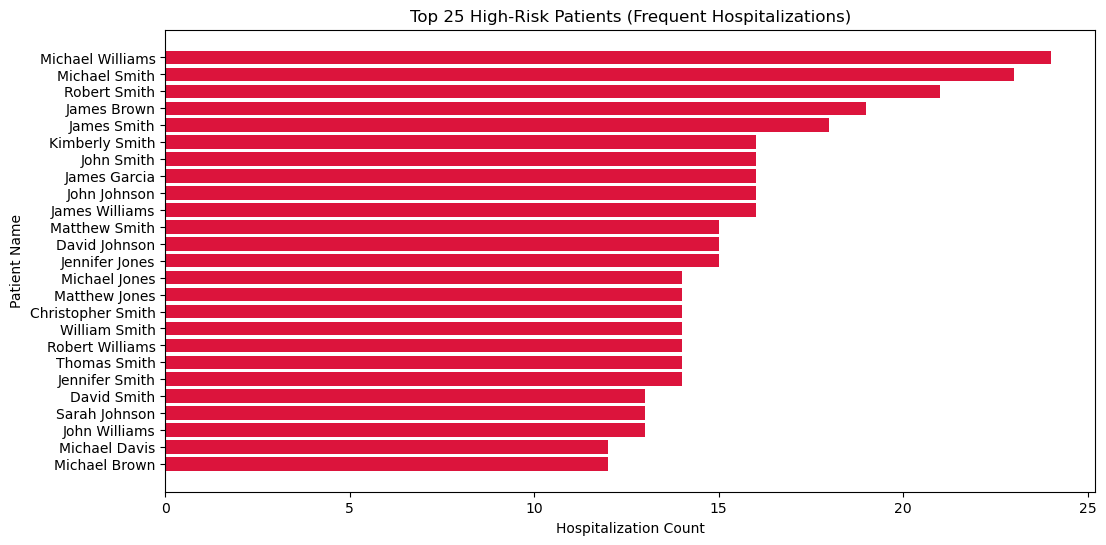

In [ ]:
# Calculate hospitalization count per patient
df["Hospitalization_Count"] = df.groupby("Name")["Date_of_Admission"].transform("count")

# Determine the 95th percentile threshold
threshold = df["Hospitalization_Count"].quantile(0.95)

# Identify high-risk patients
high_risk_patients = df[df["Hospitalization_Count"] >= threshold]

# Remove duplicates to get unique patients and sort them by hospitalization count
high_risk_patients = high_risk_patients[["Name", "Hospitalization_Count"]].drop_duplicates().sort_values(by="Hospitalization_Count", ascending=False)

# Select only the top 25 patients
top_25_high_risk = high_risk_patients.head(25)

# Plot top 25 high-risk patients
plt.figure(figsize=(12, 6))
plt.barh(top_25_high_risk["Name"], top_25_high_risk["Hospitalization_Count"], color='crimson')
plt.xlabel("Hospitalization Count")
plt.ylabel("Patient Name")
plt.title("Top 25 High-Risk Patients (Frequent Hospitalizations)")
plt.gca().invert_yaxis()  # Invert to show highest first
plt.show()

10.Which hospitals have the highest recovery rate (shortest average hospital stay) for each disease?

In [ ]:
cancer_patients = df[df["Medical_Condition"].str.contains("Cancer", case=False, na=False)]
recovery_rate = cancer_patients.groupby("Hospital")["Length_of_Stay"].mean().sort_values()

# Compute length of stay for each disease-hospital combination
df["Length_of_Stay"] = (df["Discharge_Date"] - df["Date_of_Admission"]).dt.days

# Get unique medical conditions
medical_conditions = df["Medical_Condition"].unique()

# Plot for each disease separately
for condition in medical_conditions:
    condition_df = df[df["Medical_Condition"] == condition]
    hospital_recovery = condition_df.groupby("Hospital")["Length_of_Stay"].mean().sort_values()
    
    # Select top 10 hospitals with the shortest stay
    top_10_hospitals = hospital_recovery.head(10)
    
    # Plot
    plt.figure(figsize=(10, 5))
    top_10_hospitals.plot(kind="bar", color="royalblue")
    plt.title(f"Top 10 Hospitals with the Shortest Stay for {condition}")
    plt.xlabel("Hospital")
    plt.ylabel("Average Length of Stay (Days)")
    plt.xticks(rotation=45)
    plt.show()


NameError: name 'df' is not defined

10.What is the impact of a patient’s insurance provider on the overall billing amount?

Insurance_Provider
Aetna               2.764987e+08
Blue Cross          2.804091e+08
Cigna               2.843341e+08
Medicare            2.829110e+08
Unitedhealthcare    2.799154e+08
Name: Billing_Amount, dtype: float64


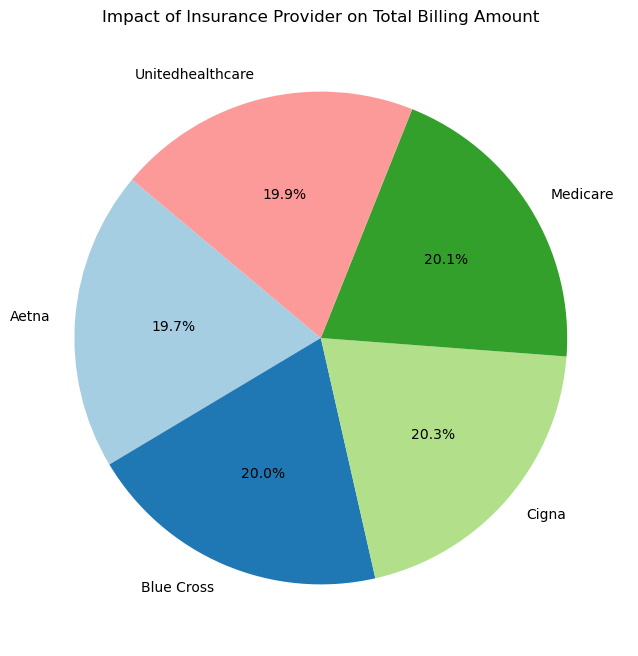

In [ ]:


insurance_billing = df.groupby("Insurance_Provider")["Billing_Amount"].sum()
print(insurance_billing)

# Group by Insurance Provider and calculate the total billing amount
insurance_billing = df.groupby("Insurance_Provider")["Billing_Amount"].sum()

# Plot the data as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(insurance_billing, labels=insurance_billing.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

# Title
plt.title("Impact of Insurance Provider on Total Billing Amount")

# Show the plot
plt.show()

11.Do hospitals charge differently for the same condition?

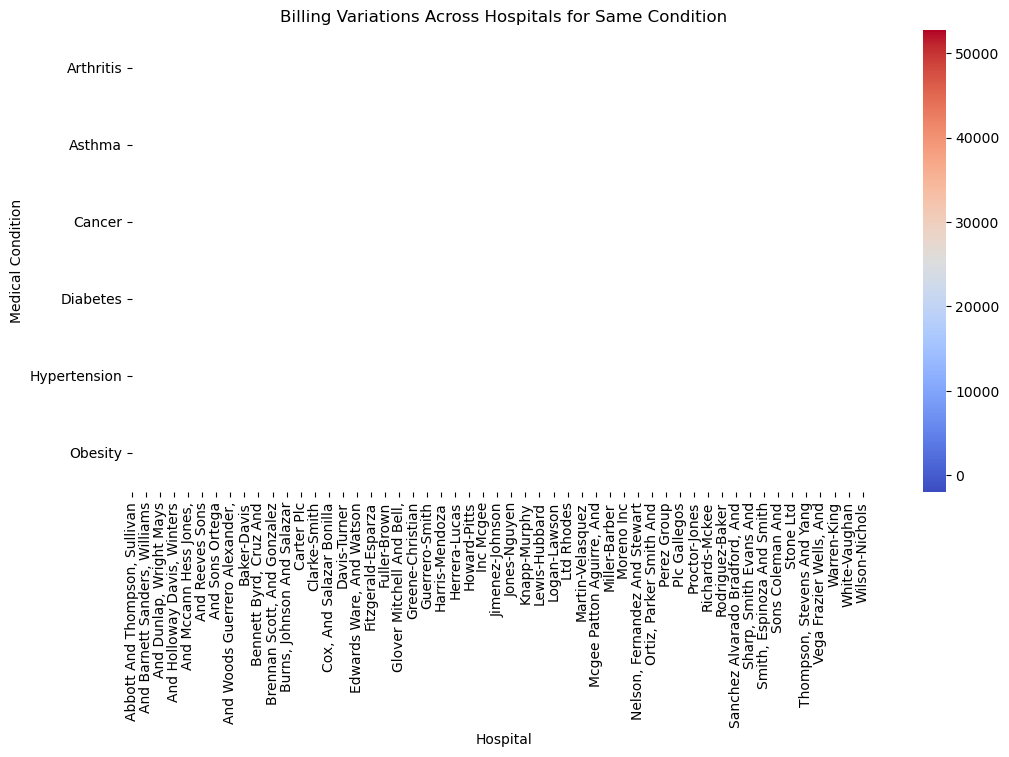

In [ ]:

billing_comparison = df.groupby(["Medical_Condition", "Hospital"])["Billing_Amount"].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(billing_comparison, cmap="coolwarm", linewidths=0.5)
plt.title("Billing Variations Across Hospitals for Same Condition")
plt.xlabel("Hospital")
plt.ylabel("Medical Condition")
plt.show()


12.What factors contribute most to high billing?

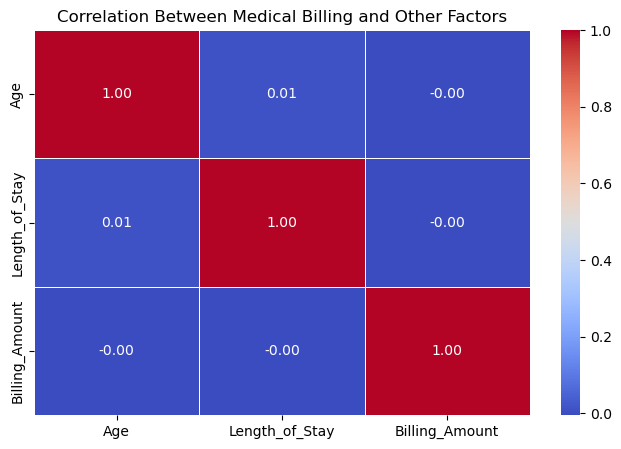

In [ ]:

corr_matrix = df[["Age", "Length_of_Stay", "Billing_Amount"]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Medical Billing and Other Factors")
plt.show()


13.What is the distribution of medications prescribed for different conditions?

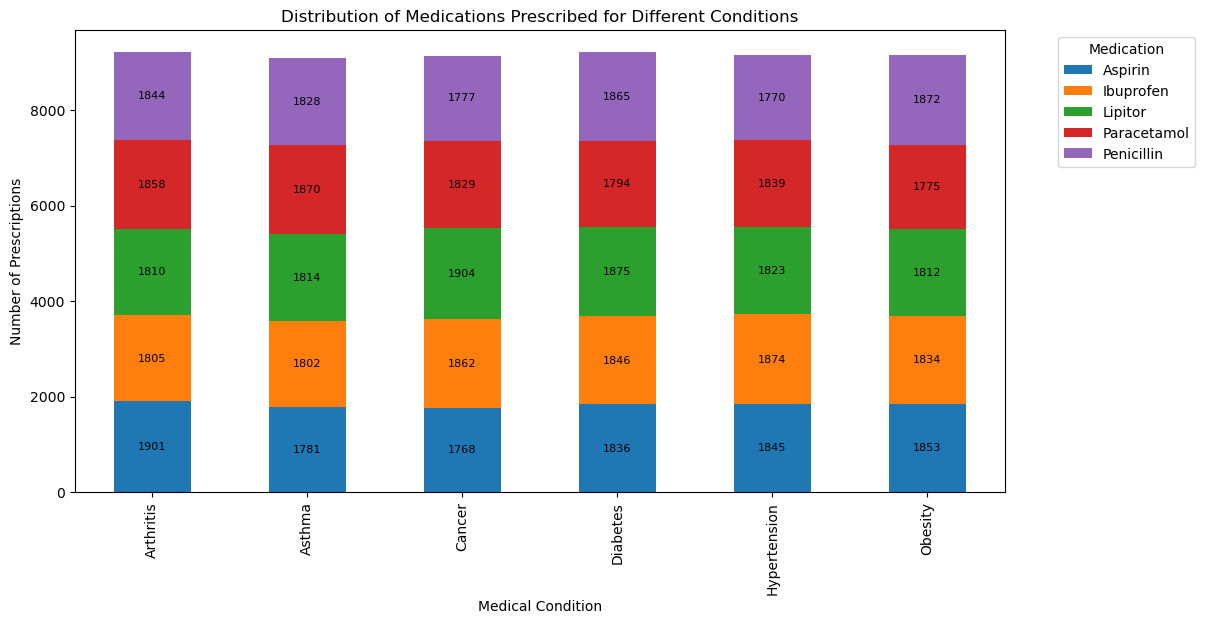

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of times each medication is prescribed for each condition
medication_distribution = df.groupby(["Medical_Condition", "Medication"]).size().unstack()

# Plot the stacked bar chart
ax = medication_distribution.plot(kind="bar", stacked=True, figsize=(12, 6))

plt.xlabel("Medical Condition")
plt.ylabel("Number of Prescriptions")
plt.title("Distribution of Medications Prescribed for Different Conditions")
plt.xticks(rotation=90)
plt.legend(title="Medication", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="center", fontsize=8)

plt.show()


14.Which doctors have the highest number of patients?

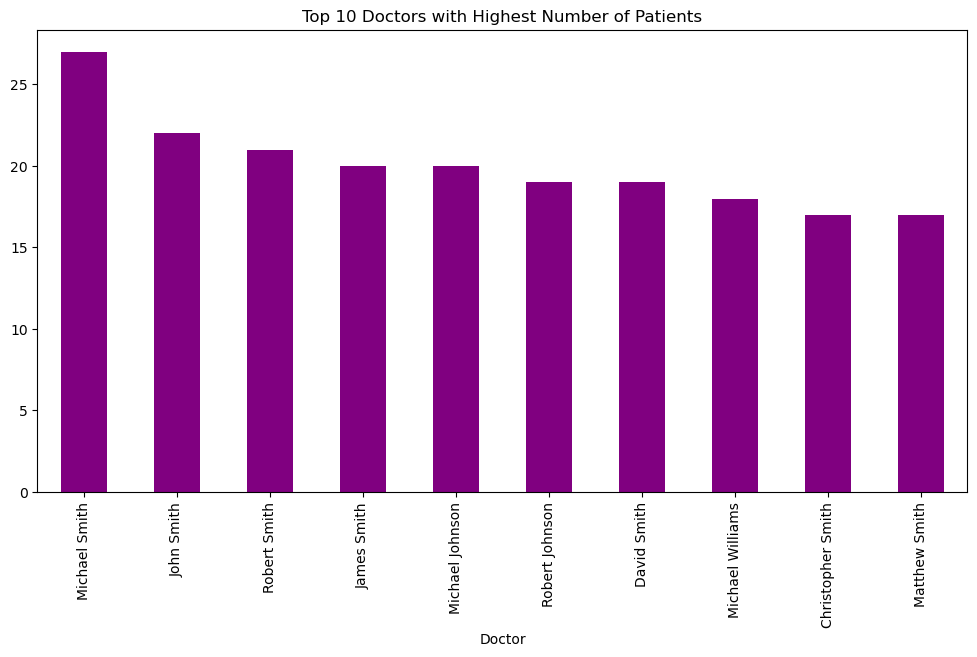

In [ ]:
top_doctors = df["Doctor"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_doctors.plot(kind="bar", color="purple")
plt.title("Top 10 Doctors with Highest Number of Patients")
plt.show()


15.Is there a correlation between a doctor’s experience and patient recovery time?

In [ ]:
doctor_recovery = df.groupby("Doctor")["Length_of_Stay"].mean().sort_values()

plt.figure(figsize=(12, 6))
doctor_recovery.plot(kind="bar", color="teal")
plt.title("Doctor Performance Based on Patient Recovery Time")
plt.show()


NameError: name 'doctor_recovery' is not defined

16.Which doctors handle the most re-hospitalized patients?

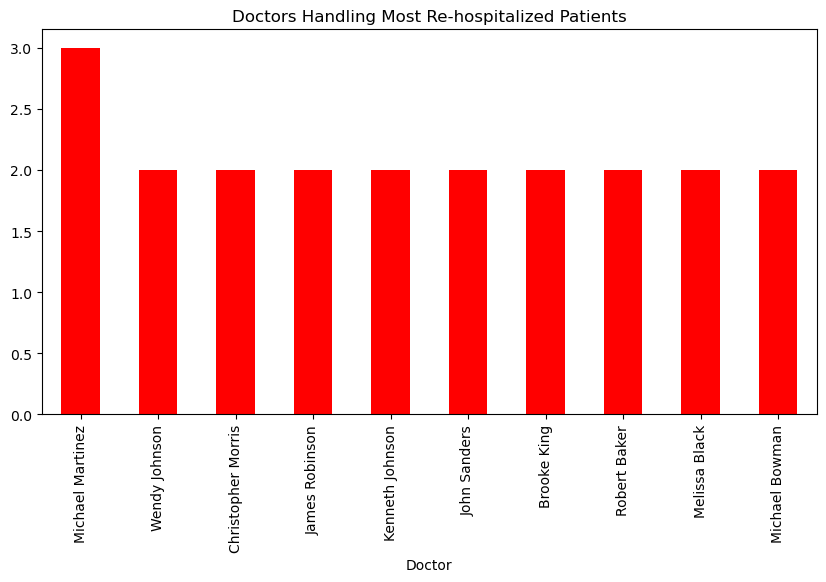

In [ ]:
rehospitalized_doctors = df[df["Hospitalization_Count"] >= threshold].groupby("Doctor")["Name"].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
rehospitalized_doctors.plot(kind="bar", color="red")
plt.title("Doctors Handling Most Re-hospitalized Patients")
plt.show()


SUGGESTIONS

While working on this project, I found that improving data accuracy is very important for getting better results. I need to make sure there are no missing or incorrect values, especially in billing amounts and hospital stay duration. It would also help to organize medical condition names properly to avoid confusion. Using machine learning could make predictions more accurate, like identifying patients at high risk or estimating hospital bills based on treatment details. To make the data more interactive, I should explore tools like Tableau, Power BI, or Plotly for better visualization. I also think adding heatmaps and trend analysis could help understand hospital performance and seasonal disease patterns. Studying doctor performance based on patient recovery rates or feedback would be useful as well. Additionally, tracking disease outbreaks by mapping patient locations could help hospitals plan better for future healthcare needs.

SUMMARY

In this project, I analyzed hospital and patient data to find useful insights about hospitalization and medical costs. I focused on identifying patients who are frequently hospitalized, studying recovery rates, and understanding how factors like age and medical condition affect hospital stays. I also looked at seasonal disease trends to find when hospitals get the most patients and explored billing patterns to understand what increases medical costs. To compare hospital performance, I checked which hospitals have the best recovery rates for diseases like cancer. I also studied how doctors prescribe medicines and interact with patients to see common treatment trends. Through this project, I learned valuable information that can help hospitals manage patients better, improve treatments, and reduce medical expenses.